# Produce Hydro Profile Using EIA Monthly Capacity Factors
---

**EIA**: Energy Information Administration

Capacity factors for utility scale generators not primarily using fossil fuel are reported by EIA in Table 4.8.B of the [Electric Annual Power 2017](https://www.eia.gov/electricity/annual/archive/pdf/03482017.pdf) report.

The quoted capacity factors are used in this notebook to produce a unique hydro profile. A unique number is given for each month and for the entire country. First, we produce hourly capacity factors by interpolating the monthly data. Then, the same capacity factor is used for each hydro plant across the country. Given the geographic diversity of the U.S., this is a strong assumption.

In [1]:
import matplotlib.pyplot as plt
from powersimdata.input.grid import Grid
from powersimdata.network.usa_tamu.usa_tamu_model import area_to_loadzone
from prereise.gather.hydrodata.eia.interpolate_capacity_factors import get_profile

## 1. Get Hydro Plant in Western Interconnection

In [2]:
grid = Grid(['Western'])
hydro_plant = grid.plant.groupby('type').get_group('hydro')

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [3]:
print("There are %d hydro plants in the Western interconnection" % len(hydro_plant))

There are 715 hydro plants in the Western interconnection


## 2. Get Profile

In [4]:
data = get_profile(hydro_plant.index.tolist())

In [5]:
data

,10390,10391,10392,10393,10394,10395,10396,10398,10399,10402,...,12850,12855,12856,12857,12858,12859,12860,12861,12862,12863
2016-01-01 00:00:00,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,...,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032,0.417032
2016-01-01 01:00:00,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,...,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089,0.417089
2016-01-01 02:00:00,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,...,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145,0.417145
2016-01-01 03:00:00,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,...,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202,0.417202
2016-01-01 04:00:00,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,...,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258,0.417258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,...,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625,0.419625
2016-12-31 20:00:00,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,...,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726,0.419726
2016-12-31 21:00:00,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,...,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827,0.419827
2016-12-31 22:00:00,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,...,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927,0.419927


## 2. Plot Profile by Zone
The daily power output is shown below. Note that the shape of the curve is the same since the same capacity factors is used for each hydro plant. However the total power output varies from one state to an other since the number of plants in a state as well as the intrinsinc capacity of the plant differ.

In [6]:
zones = ['Oregon', 'Washington', 'Nevada', 'Colorado']

In [7]:
def get_plant_id(area):
    load_zones = area_to_loadzone(grid, area)
    plant_id = hydro_plant[(hydro_plant.zone_name.isin(load_zones))].index
    return plant_id

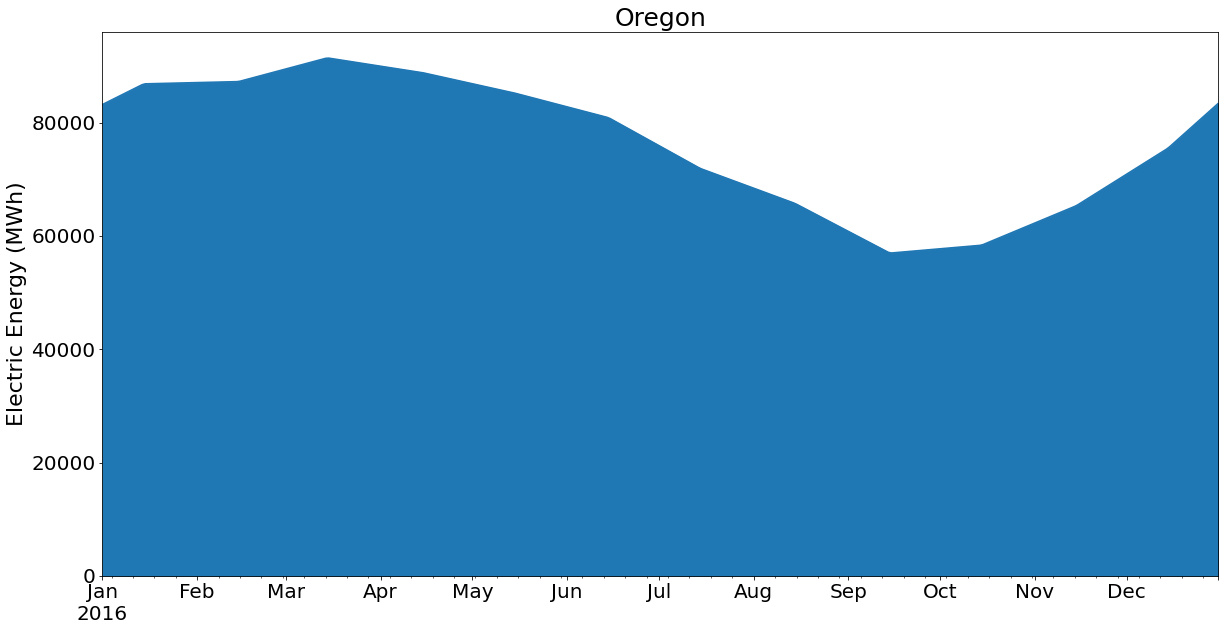

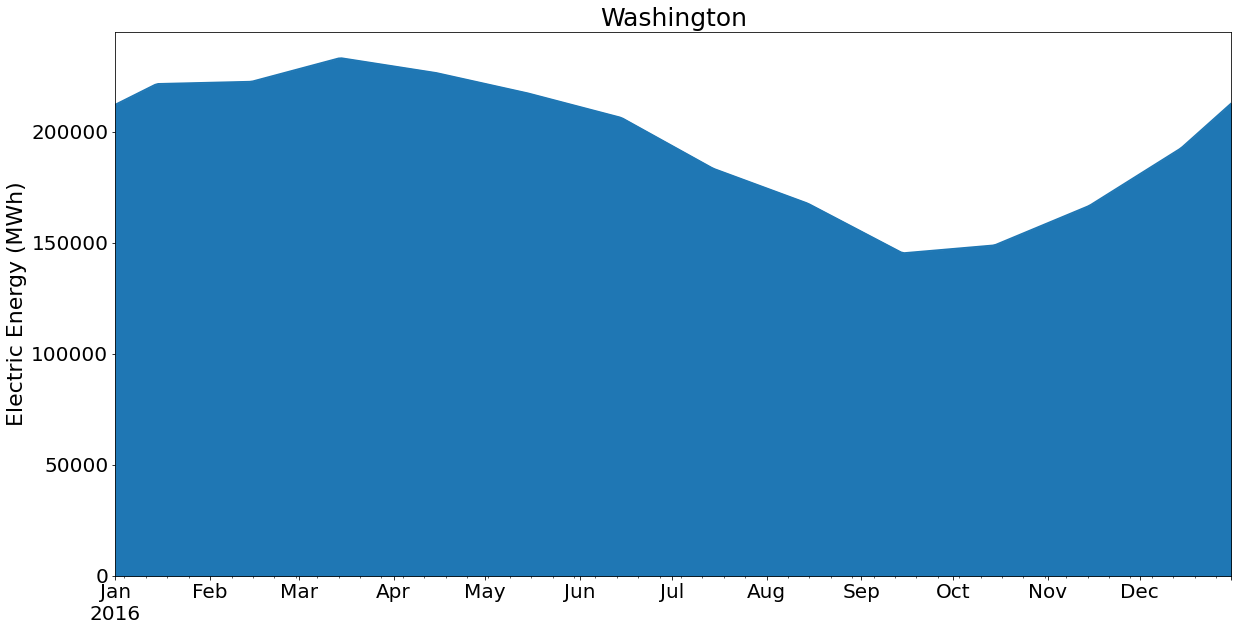

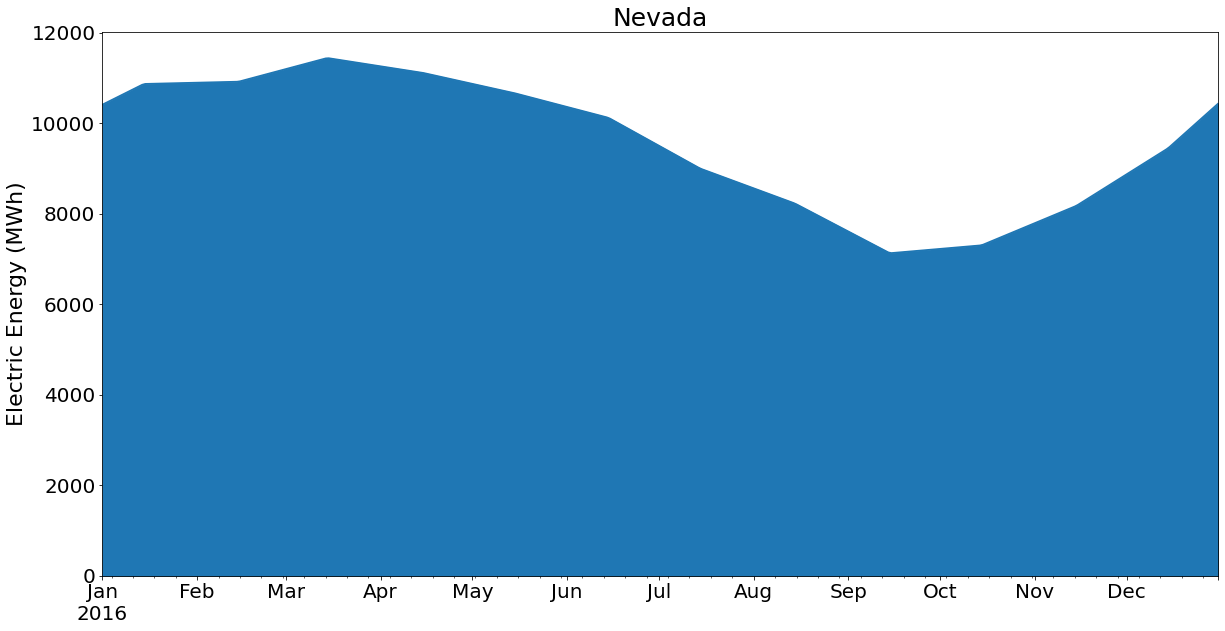

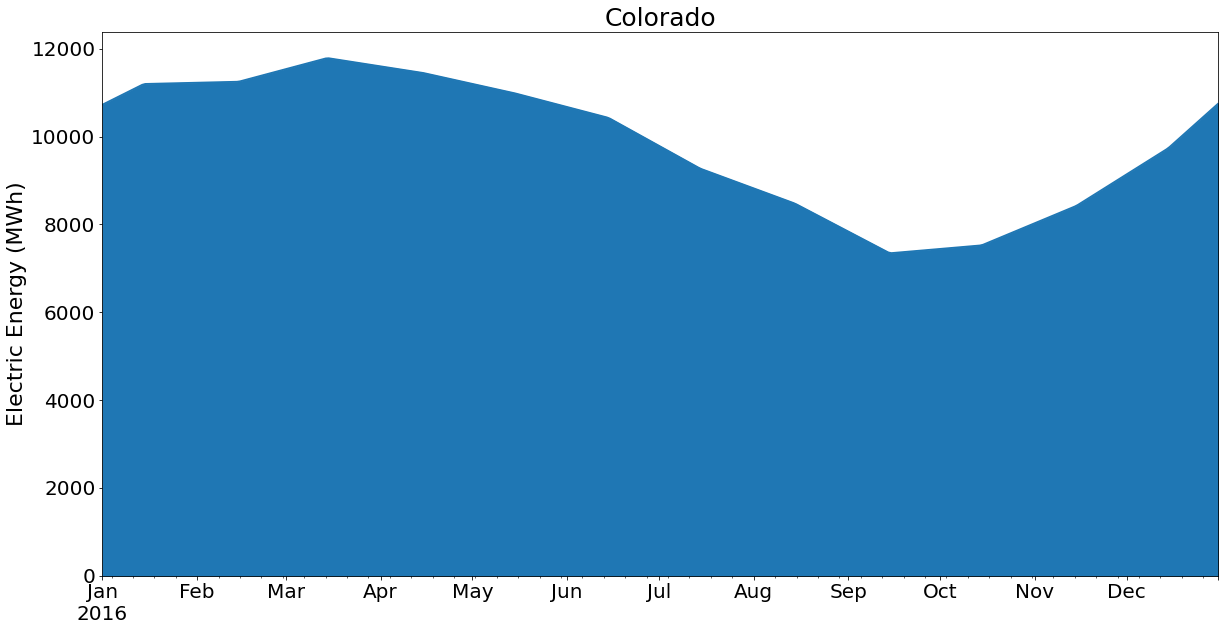

In [8]:
for z in zones:
    fig = plt.figure(figsize=(20, 10))
    plt.title('%s' % z, fontsize=25)
    ax = fig.gca()
    ax.grid(color='black', axis='y')
    ax.tick_params(which='both', labelsize=20)
    ax.set_ylabel('Electric Energy (MWh)', fontsize=22)

    plant_id = get_plant_id(z)
    generation = data[plant_id] * hydro_plant.loc[plant_id, "Pmax"]
    generation.resample('D', label='left').sum().sum(axis=1).plot(kind='area', ax=ax)

plt.show()